In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [5]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [6]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [8]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [9]:
x = df.drop(columns=['Exited'])
y = df['Exited']


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,Dropout

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
x.shape

(10000, 11)

In [13]:
x_train.shape

(8000, 11)

In [14]:
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.fit_transform(x_test)

In [15]:
model=Sequential()
model.add(Dense(17,activation='relu' ,input_dim=11))
model.add(Dense(17,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                204       
                                                                 
 dense_1 (Dense)             (None, 17)                306       
                                                                 
 dropout (Dropout)           (None, 17)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 18        
                                                                 
Total params: 528 (2.06 KB)
Trainable params: 528 (2.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='Adam', loss='binary_crossentropy' , metrics=['accuracy'])

In [18]:
history = model.fit(x_train_scaled,y_train,epochs=70 ,validation_split=0.2 )

Epoch 1/70
200/200 [==============================] - 1s 3ms/step - loss: 0.4963 - accuracy: 0.7884 - val_loss: 0.4393 - val_accuracy: 0.8056
Epoch 2/70
200/200 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8075 - val_loss: 0.4212 - val_accuracy: 0.8169
Epoch 3/70
200/200 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8183 - val_loss: 0.4121 - val_accuracy: 0.8206
Epoch 4/70
200/200 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8239 - val_loss: 0.4014 - val_accuracy: 0.8244
Epoch 5/70
200/200 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8330 - val_loss: 0.3876 - val_accuracy: 0.8313
Epoch 6/70
200/200 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8402 - val_loss: 0.3788 - val_accuracy: 0.8388
Epoch 7/70
200/200 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8444 - val_loss: 0.3711 - val_accuracy: 0.8413
Epoch 

200/200 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8659 - val_loss: 0.3589 - val_accuracy: 0.8562
Epoch 59/70
200/200 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8670 - val_loss: 0.3582 - val_accuracy: 0.8544
Epoch 60/70
200/200 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8644 - val_loss: 0.3571 - val_accuracy: 0.8525
Epoch 61/70
200/200 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8673 - val_loss: 0.3571 - val_accuracy: 0.8500
Epoch 62/70
200/200 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8642 - val_loss: 0.3576 - val_accuracy: 0.8537
Epoch 63/70
200/200 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8673 - val_loss: 0.3562 - val_accuracy: 0.8531
Epoch 64/70
200/200 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8672 - val_loss: 0.3565 - val_accuracy: 0.8512
Epoch 65/70

In [19]:
# layer no 1
model.layers[0].get_weights()

[array([[-4.57637869e-02,  1.09455064e-02, -2.43026540e-01,
         -2.22585816e-02, -3.74852195e-02,  1.17971048e-01,
         -6.26226738e-02, -2.24503651e-01,  3.70901427e-03,
          1.57352224e-01,  1.07092254e-01,  6.07113019e-02,
         -7.89980069e-02,  6.02903403e-02,  1.87853649e-01,
          2.89395332e-01, -1.87242284e-01],
        [-1.39359325e-01,  8.08462858e-01, -6.39687106e-02,
          5.99781632e-01,  6.83258593e-01, -7.07734585e-01,
          1.17206186e-01,  7.53690824e-02, -2.19248086e-01,
         -5.27344584e-01,  1.21103950e-01, -1.98189586e-01,
          4.24743652e-01, -2.93321073e-01, -1.54443875e-01,
         -4.38315004e-01, -1.54327512e-01],
        [ 1.65145412e-01, -9.84759629e-02, -3.33562940e-01,
          2.16616318e-02,  6.13400899e-02, -2.62273662e-02,
          3.30457129e-02,  1.55237690e-01, -7.52287079e-03,
          2.07107410e-01,  1.78622201e-01, -7.59263188e-02,
          2.08461046e-01,  1.89269841e-01, -2.46252745e-01,
         -3.

In [20]:
import matplotlib.pyplot as plt


In [21]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.496320,0.788437,0.439303,0.805625
1,0.446274,0.807500,0.421167,0.816875
2,0.424335,0.818281,0.412101,0.820625
3,0.413483,0.823906,0.401419,0.824375
4,0.398572,0.832969,0.387619,0.831250
...,...,...,...,...
65,0.327163,0.866406,0.358314,0.851875
66,0.326720,0.867188,0.359294,0.850000
67,0.327535,0.865937,0.357962,0.852500
68,0.322553,0.868281,0.357220,0.850625


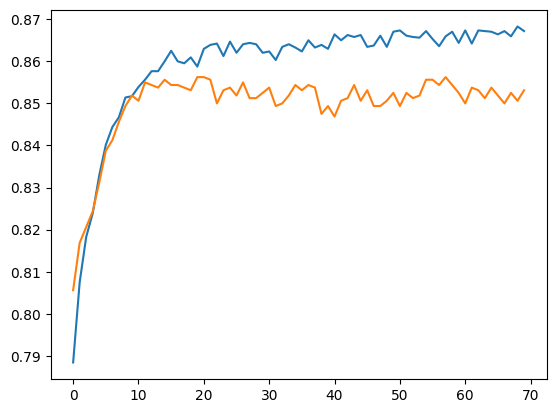

In [22]:
plt.plot(pd.DataFrame(history.history)['accuracy'])
plt.plot(pd.DataFrame(history.history)['val_accuracy'])

In [23]:
y_log=model.predict(x_test_scaled)
y_log

63/63 [==============================] - 0s 2ms/step


array([[0.22420414],
       [0.29588673],
       [0.15047   ],
       ...,
       [0.34225345],
       [0.14598207],
       [0.25096372]], dtype=float32)

In [24]:
y_pred=np.where(y_log>0.5,1,0)

In [25]:
score=accuracy_score(y_pred,y_test)
score

0.862

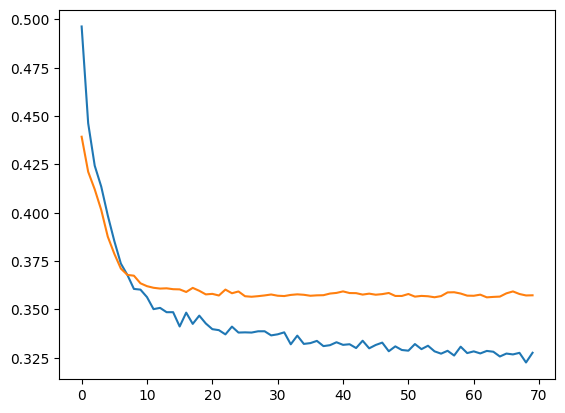

In [26]:
plt.plot(pd.DataFrame(history.history)['loss'])
plt.plot(pd.DataFrame(history.history)['val_loss'])

### Accuracy 0.862